In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

In [2]:
# Đọc dữ liệu từ file đã mã hóa
df = pd.read_csv("preprocess_cleaned.csv")  # File đã tiền xử lý

# Tách nhãn và đặc trưng
X = df.drop(columns="HadStroke")
y = df["HadStroke"]

# Tách dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

🔍 Đánh giá mô hình Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     43363
           1       0.99      1.00      1.00     43328

    accuracy                           1.00     86691
   macro avg       1.00      1.00      1.00     86691
weighted avg       1.00      1.00      1.00     86691

✅ Mô hình đã được lưu tại: stroke_predictor_rf_model.pkl


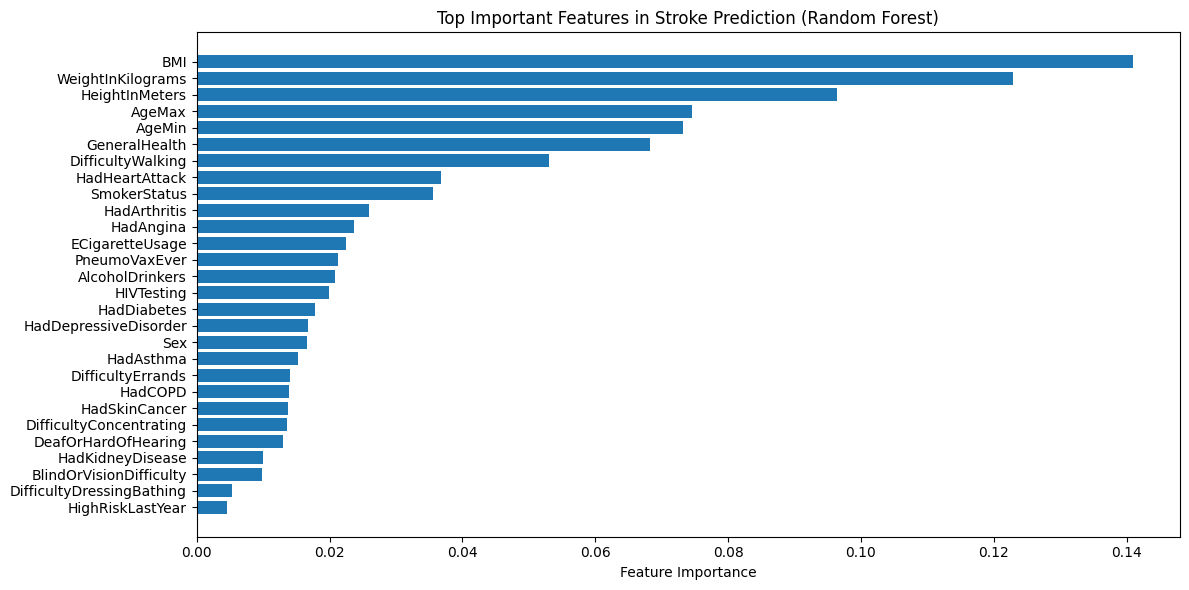

In [3]:
# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Đánh giá mô hình
y_pred = model.predict(X_test)
print("🔍 Đánh giá mô hình Random Forest:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# Lưu mô hình vào thư mục hiện tại
joblib.dump(model, "../../backend/models/stroke_predictor_rf_model.pkl")
print("✅ Mô hình đã được lưu tại: stroke_predictor_rf_model.pkl")

# 📊 Biểu đồ tầm quan trọng của đặc trưng
importances = model.feature_importances_
features = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), features[sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Top Important Features in Stroke Prediction (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()